In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
%matplotlib inline

In [19]:
ds = xr.open_dataset('sat_2018120100_2019022818_4xDaily.nc')
T = ds.air

ds_slp = xr.open_dataset('slp_2018120100_2019022818_4xDaily.nc')
P = ds_slp.slp

ds_v = xr.open_dataset('v_2018120100_2019022818_4xDaily.nc')
v = ds_v.vwnd


#### Select NYC grid point and calculate daily average from the 4 data points (6 hourly data)

In [5]:
time = np.arange(0,90)
time

time2 = np.arange(0,360)

In [6]:
T_nyc = T.isel(lon = 114, lat = 20)
T_daily = T_nyc.resample(time = 'D').mean()
T_daily

<xarray.DataArray 'air' (time: 90)>
array([275.69998, 281.84998, 284.625  , 277.59998, 273.44998, 273.525  ,
       275.15   , 271.9    , 272.5    , 272.175  , 273.05002, 274.525  ,
       277.09998, 279.07498, 281.65   , 280.94998, 278.02496, 275.25   ,
       273.125  , 275.62497, 284.69998, 281.375  , 276.55   , 276.975  ,
       274.87497, 274.25   , 276.27496, 280.775  , 283.525  , 276.175  ,
       276.77496, 284.55   , 276.975  , 277.275  , 276.65   , 280.15   ,
       279.125  , 273.25   , 276.8    , 279.77496, 272.82498, 269.59998,
       269.32498, 270.72498, 269.94998, 270.34998, 272.125  , 272.14996,
       273.05   , 274.125  , 276.84998, 261.15   , 263.8    , 272.625  ,
       281.82498, 273.57495, 270.55   , 274.625  , 273.05   , 272.24997,
       270.575  , 258.625  , 261.9    , 264.225  , 273.75   , 275.875  ,
       278.64996, 277.47498, 277.92496, 279.175  , 271.07498, 270.05   ,
       272.22498, 273.09998, 276.27496, 274.4    , 279.3    , 276.62497,
       272.125 

In [7]:
#from Ty
T_diurnal = T_nyc.groupby(T_nyc.time.dt.hour).mean(dim = 'time')
T_rm = T_nyc - np.tile(T_diurnal, 90)
T_rm

<xarray.DataArray 'air' (time: 360)>
array([ 1.36441 ,  0.626678,  0.871155, ...,  0.026642, -2.628876, -3.812225],
      dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 285.0
  * time     (time) datetime64[ns] 2018-12-01 ... 2019-02-28T18:00:00

In [8]:
P_nyc = P.isel(lon = 114, lat = 20)
P_daily = P_nyc.resample(time = 'D').mean()
P_daily

P_diurnal = P_nyc.groupby(P_nyc.time.dt.hour).mean(dim = 'time')
P_rm = P_nyc - np.tile(P_diurnal, 90)
P_rm

<xarray.DataArray 'slp' (time: 360)>
array([-129.      ,   62.890625,  245.21875 , ..., -497.10938 , -144.78125 ,
        256.33594 ], dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 285.0
  * time     (time) datetime64[ns] 2018-12-01 ... 2019-02-28T18:00:00

In [9]:
v_nyc = v.isel(lon = 114, lat = 20)
v_daily = v_nyc.resample(time = 'D').mean()
v_daily

v_diurnal = v_nyc.groupby(v_nyc.time.dt.hour).mean(dim = 'time')
v_rm = v_nyc - np.tile(v_diurnal, 90)
v_rm

<xarray.DataArray 'vwnd' (time: 360)>
array([-2.186666, -1.545555, -1.677777, ...,  2.454445, -3.877777, -3.834444],
      dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 285.0
  * time     (time) datetime64[ns] 2018-12-01 ... 2019-02-28T18:00:00

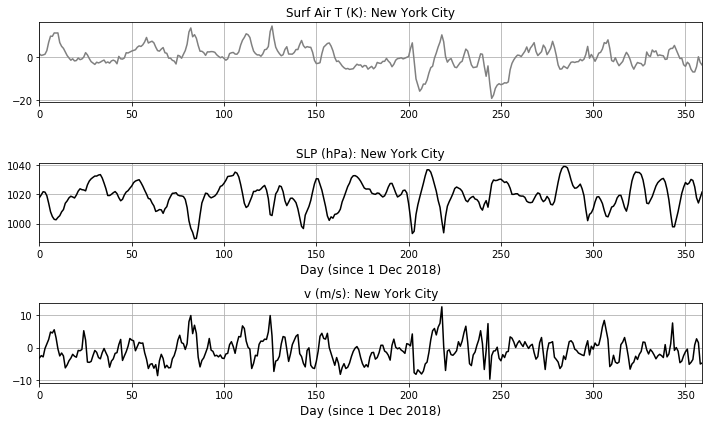

In [10]:
fig, ax = plt.subplots(nrows = 3, figsize = (10,6))

ax[0].plot(time2, T_rm, 'grey')
#plt.plot(T_surf, tao_values)
ax[0].set_title('Surf Air T (K): New York City', fontsize = 12)
ax[0].set_xlabel('', fontsize = 12)
#ax[0].set_ylabel('temp (K)', fontsize = 12);
ax[0].grid()
ax[0].set_xlim(time2.min(), time2.max());
#ax.set_xlim(150, 350)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
#ax[0].legend(['RE', 'RCE'], fontsize = 14)

ax[1].plot(time2, P_nyc/100, 'k')
#plt.plot(T_surf, tao_values)
ax[1].set_title('SLP (hPa): New York City', fontsize = 12)
ax[1].set_xlabel('Day (since 1 Dec 2018)', fontsize = 12)
#ax[1].set_ylabel('temp (K)', fontsize = 12);
ax[1].grid()
ax[1].set_xlim(time2.min(), time2.max());

ax[2].plot(time2, v_nyc, 'k')
#plt.plot(T_surf, tao_values)
ax[2].set_title('v (m/s): New York City', fontsize = 12)
ax[2].set_xlabel('Day (since 1 Dec 2018)', fontsize = 12)
#ax[2].set_ylabel('Meridional wind (K)', fontsize = 12);
#ax[2].xaxis.grid('minor')
ax[2].grid()
ax[2].set_xlim(time2.min(), time2.max());

plt.tight_layout()

#### calculate lag-covariances for the pairs (v', T'), (v', P'), (P', T') 

In [11]:
# calculate the winter average for each variabile
T_winter_mean = np.mean(T_rm)
T_winter_mean
T_prime = T_rm - T_winter_mean
T_prime

<xarray.DataArray 'air' (time: 360)>
array([ 1.364414,  0.626682,  0.871158, ...,  0.026645, -2.628872, -3.812222],
      dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 285.0
  * time     (time) datetime64[ns] 2018-12-01 ... 2019-02-28T18:00:00

In [12]:
P_winter_mean = np.mean(P_nyc)
P_winter_mean
P_prime = P_nyc - P_winter_mean
P_prime  

<xarray.DataArray 'slp' (time: 360)>
array([-133.64062 ,   56.359375,  266.35938 , ..., -503.64062 , -123.640625,
        246.35938 ], dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 285.0
  * time     (time) datetime64[ns] 2018-12-01 ... 2019-02-28T18:00:00

In [13]:
v_winter_mean = np.mean(v_nyc)
v_winter_mean
v_prime = v_nyc - v_winter_mean
v_prime

<xarray.DataArray 'vwnd' (time: 360)>
array([-2.16111 , -1.461111, -1.861111, ...,  2.538889, -4.06111 , -3.76111 ],
      dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 285.0
  * time     (time) datetime64[ns] 2018-12-01 ... 2019-02-28T18:00:00

In [95]:
lag = np.arange(1, 9, 1)
lag

array([1, 2, 3, 4, 5, 6, 7, 8])

In [17]:
lag2 = np.arange(-8, 9, 1)
lag2

array([-8, -7, -6, -5, -4, -3, -2, -1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [14]:
def lag_cov(x,y,k):
    if(k >= 0):
        cov = np.cov(x[:len(x)-k],y[k:])
    if(k < 0):
        cov = np.cov(x[(-1*k):],y[:len(y)-(-1*k)])
    return cov[0,1]

In [15]:
vprime_tprime = [lag_cov(v_rm, T_rm, k) for k in range (-8, 9, 1)]
vprime_tprime

vprime_pprime = [lag_cov(v_rm, P_rm/100, k) for k in range (-8, 9, 1)]
vprime_pprime

pprime_tprime = [lag_cov(P_rm/100, T_rm, k) for k in range (-8, 9, 1)]
pprime_tprime

[-3.508353414036852,
 -6.056970218077258,
 -9.664224470435126,
 -14.060484694050713,
 -18.60907291167339,
 -22.692618693071843,
 -26.059535037388137,
 -28.273992783149136,
 -26.93365481530324,
 -20.741383528913044,
 -12.501859244110216,
 -4.816514392049099,
 1.3779270947369928,
 5.755469425597658,
 8.316232536659115,
 9.295091145638997,
 9.042606326467858]

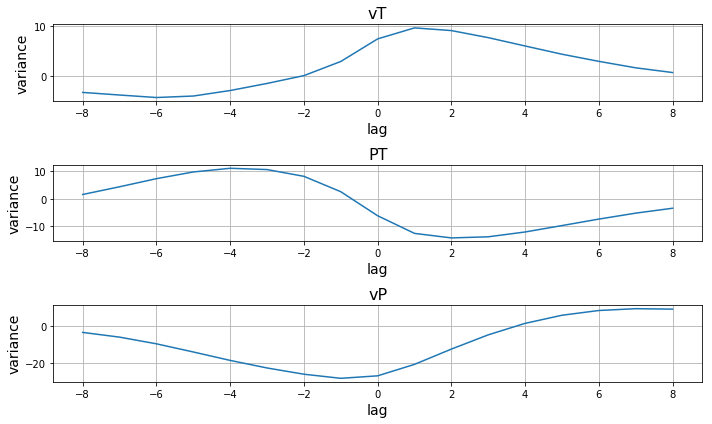

In [18]:
fig, ax = plt.subplots(nrows = 3, figsize = (10,6))

ax[0].plot(lag2, vprime_tprime)
#plt.plot(T_surf, tao_values)
ax[0].set_title('vT', fontsize = 16)
ax[0].set_xlabel('lag', fontsize = 14)
ax[0].set_ylabel('variance', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, tau_inf);
#ax.set_xlim(0, 0.5);

ax[1].plot(lag2, vprime_pprime)
#plt.plot(T_surf, tao_values)
ax[1].set_title('PT', fontsize = 16)
ax[1].set_xlabel('lag', fontsize = 14)
ax[1].set_ylabel('variance', fontsize = 14);
ax[1].grid()

ax[2].plot(lag2, pprime_tprime)
#plt.plot(T_surf, tao_values)
ax[2].set_title('vP', fontsize = 16)
ax[2].set_xlabel('lag', fontsize = 14)
ax[2].set_ylabel('variance', fontsize = 14);
ax[2].grid()

plt.tight_layout()
fig.savefig('climate_dynamics_HW4_3b_vT.png')

#### Onto summer! 

In [20]:
ds_sm = xr.open_dataset('sat_2018060100_2018083118_4xDaily.nc')
T_sm = ds_sm.air

ds_slp_sm = xr.open_dataset('slp_2018060100_2018083118_4xDaily.nc')
P_sm = ds_slp_sm.slp

ds_v_sm = xr.open_dataset('v_2018060100_2018083118_4xDaily.nc')
v_sm = ds_v_sm.vwnd

In [33]:
T_nyc_sm = T_sm.isel(lon = 114, lat = 20)
T_diurnal_sm = T_nyc_sm.groupby(T_nyc_sm.time.dt.hour).mean(dim = 'time')
T_rm_sm = T_nyc_sm - np.tile(T_diurnal_sm, 92)

P_nyc_sm = P_sm.isel(lon = 114, lat = 20)
P_diurnal_sm = P_nyc_sm.groupby(P_nyc_sm.time.dt.hour).mean(dim = 'time')
P_rm_sm = P_nyc_sm - np.tile(P_diurnal_sm, 92)

v_nyc_sm = v_sm.isel(lon = 114, lat = 20)
v_diurnal_sm = v_nyc_sm.groupby(v_nyc_sm.time.dt.hour).mean(dim = 'time')
v_rm_sm = v_nyc_sm - np.tile(v_diurnal_sm, 92)

<xarray.DataArray 'vwnd' (time: 360)>
array([-2.186666, -1.545555, -1.677777, ...,  2.454445, -3.877777, -3.834444],
      dtype=float32)
Coordinates:
    lat      float32 40.0
    lon      float32 285.0
  * time     (time) datetime64[ns] 2018-12-01 ... 2019-02-28T18:00:00

In [36]:
time3 = np.arange(0,368)

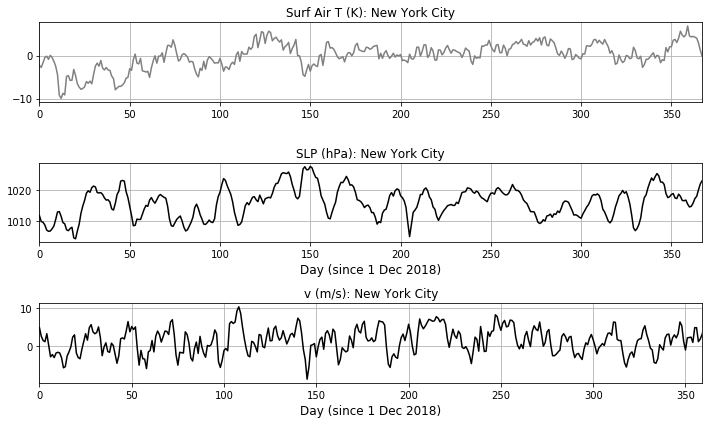

In [38]:
fig, ax = plt.subplots(nrows = 3, figsize = (10,6))

ax[0].plot(time3, T_rm_sm, 'grey')
#plt.plot(T_surf, tao_values)
ax[0].set_title('Surf Air T (K): New York City', fontsize = 12)
ax[0].set_xlabel('', fontsize = 12)
#ax[0].set_ylabel('temp (K)', fontsize = 12);
ax[0].grid()
ax[0].set_xlim(time3.min(), time3.max());
#ax.set_xlim(150, 350)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
#ax[0].legend(['RE', 'RCE'], fontsize = 14)

ax[1].plot(time3, P_nyc_sm/100, 'k')
#plt.plot(T_surf, tao_values)
ax[1].set_title('SLP (hPa): New York City', fontsize = 12)
ax[1].set_xlabel('Day (since 1 Dec 2018)', fontsize = 12)
#ax[1].set_ylabel('temp (K)', fontsize = 12);
ax[1].grid()
ax[1].set_xlim(time3.min(), time3.max());

ax[2].plot(time3, v_nyc_sm, 'k')
#plt.plot(T_surf, tao_values)
ax[2].set_title('v (m/s): New York City', fontsize = 12)
ax[2].set_xlabel('Day (since 1 Dec 2018)', fontsize = 12)
#ax[2].set_ylabel('Meridional wind (K)', fontsize = 12);
#ax[2].xaxis.grid('minor')
ax[2].grid()
ax[2].set_xlim(time2.min(), time2.max());

plt.tight_layout()

In [34]:
vprime_tprime_sm = [lag_cov(v_rm_sm, T_rm_sm, k) for k in range (-8, 9, 1)]
vprime_tprime_sm

vprime_pprime_sm = [lag_cov(v_rm_sm, P_rm_sm/100, k) for k in range (-8, 9, 1)]
vprime_pprime_sm

pprime_tprime_sm = [lag_cov(P_rm_sm/100, T_rm_sm, k) for k in range (-8, 9, 1)]
pprime_tprime_sm

[2.4311652271329045,
 2.2718268400527983,
 2.02717823626379,
 1.6988550480993032,
 1.3694173216346284,
 1.0841805137347775,
 0.802257927599791,
 0.5935412075594577,
 0.6683907449551115,
 1.2385423963106432,
 1.8616232275017803,
 2.522423645301339,
 3.239215768106199,
 3.88610584032164,
 4.269009491392427,
 4.452497466192157,
 4.51460970736319]

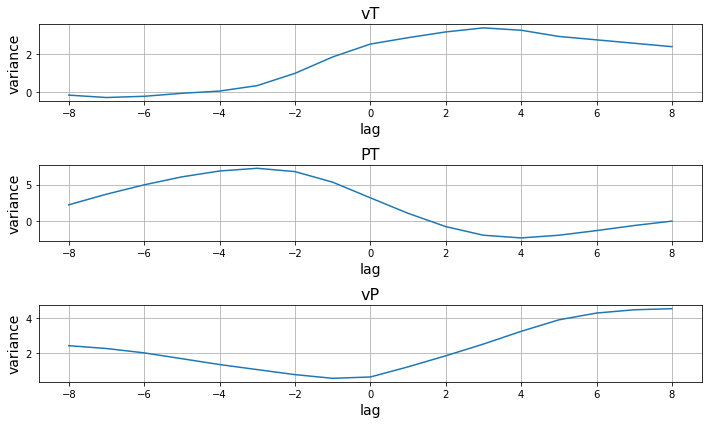

In [39]:
fig, ax = plt.subplots(nrows = 3, figsize = (10,6))

ax[0].plot(lag2, vprime_tprime_sm)
#plt.plot(T_surf, tao_values)
ax[0].set_title('vT', fontsize = 16)
ax[0].set_xlabel('lag', fontsize = 14)
ax[0].set_ylabel('variance', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, tau_inf);
#ax.set_xlim(0, 0.5);

ax[1].plot(lag2, vprime_pprime_sm)
#plt.plot(T_surf, tao_values)
ax[1].set_title('PT', fontsize = 16)
ax[1].set_xlabel('lag', fontsize = 14)
ax[1].set_ylabel('variance', fontsize = 14);
ax[1].grid()

ax[2].plot(lag2, pprime_tprime_sm)
#plt.plot(T_surf, tao_values)
ax[2].set_title('vP', fontsize = 16)
ax[2].set_xlabel('lag', fontsize = 14)
ax[2].set_ylabel('variance', fontsize = 14);
ax[2].grid()

plt.tight_layout()
#fig.savefig('climate_dynamics_HW4_3b_vT.png')

#### Equator winter 

In [42]:
T_eq = T.isel(lon = 114, lat = 36)

P_eq = P.isel(lon = 114, lat = 36)

v_eq = v.isel(lon = 114, lat = 36)

In [44]:
T_diurnal_eq = T_nyc.groupby(T_eq.time.dt.hour).mean(dim = 'time')
T_rm_eq = T_eq - np.tile(T_diurnal_eq, 90)

P_diurnal_eq = P_eq.groupby(P_eq.time.dt.hour).mean(dim = 'time')
P_rm_eq = P_eq - np.tile(P_diurnal_eq, 90)

v_diurnal_eq = v_eq.groupby(v_eq.time.dt.hour).mean(dim = 'time')
v_rm_eq = v_eq - np.tile(v_diurnal_eq, 90)

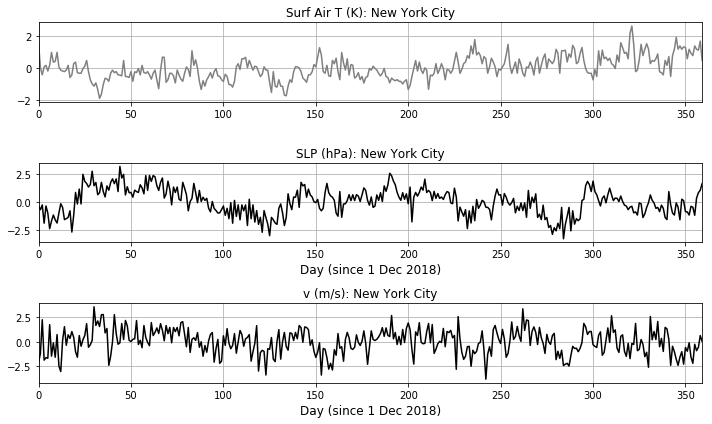

In [45]:
fig, ax = plt.subplots(nrows = 3, figsize = (10,6))

ax[0].plot(time2, T_rm_eq, 'grey')
#plt.plot(T_surf, tao_values)
ax[0].set_title('Surf Air T (K): New York City', fontsize = 12)
ax[0].set_xlabel('', fontsize = 12)
#ax[0].set_ylabel('temp (K)', fontsize = 12);
ax[0].grid()
ax[0].set_xlim(time2.min(), time2.max());
#ax.set_xlim(150, 350)
#plt.axhline(y = pi_B_sfc, color = 'k', linewidth = 1.5, linestyle = '--')
#plt.axhline(y = pi_B_above, color = 'k', linewidth = 1.5, linestyle = ':')
#plt.axhline(y = So, color = 'k', linewidth = 1.5, linestyle = '-.')
#ax[0].legend(['RE', 'RCE'], fontsize = 14)

ax[1].plot(time2, P_rm_eq/100, 'k')
#plt.plot(T_surf, tao_values)
ax[1].set_title('SLP (hPa): New York City', fontsize = 12)
ax[1].set_xlabel('Day (since 1 Dec 2018)', fontsize = 12)
#ax[1].set_ylabel('temp (K)', fontsize = 12);
ax[1].grid()
ax[1].set_xlim(time2.min(), time2.max());

ax[2].plot(time2, v_rm_eq, 'k')
#plt.plot(T_surf, tao_values)
ax[2].set_title('v (m/s): New York City', fontsize = 12)
ax[2].set_xlabel('Day (since 1 Dec 2018)', fontsize = 12)
#ax[2].set_ylabel('Meridional wind (K)', fontsize = 12);
#ax[2].xaxis.grid('minor')
ax[2].grid()
ax[2].set_xlim(time2.min(), time2.max());

plt.tight_layout()

In [47]:
vprime_tprime_eq = [lag_cov(v_rm_eq, T_rm_eq, k) for k in range (-8, 9, 1)]

vprime_pprime_eq = [lag_cov(v_rm_eq, P_rm_eq/100, k) for k in range (-8, 9, 1)]

pprime_tprime_eq = [lag_cov(P_rm_eq/100, T_rm_eq, k) for k in range (-8, 9, 1)]

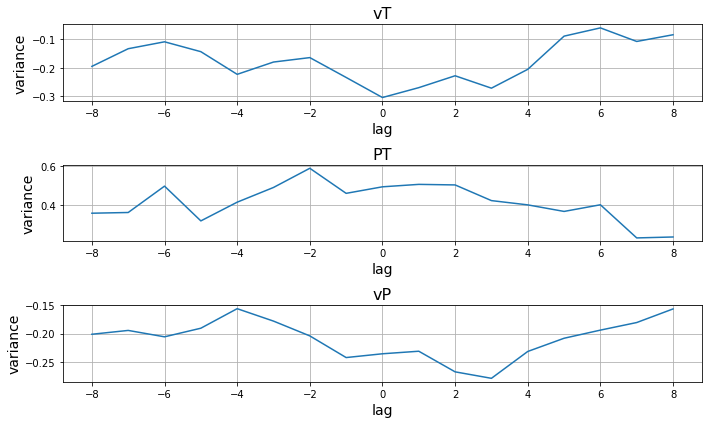

In [48]:
fig, ax = plt.subplots(nrows = 3, figsize = (10,6))

ax[0].plot(lag2, vprime_tprime_eq)
#plt.plot(T_surf, tao_values)
ax[0].set_title('vT', fontsize = 16)
ax[0].set_xlabel('lag', fontsize = 14)
ax[0].set_ylabel('variance', fontsize = 14);
ax[0].grid()
#ax.set_ylim(0, tau_inf);
#ax.set_xlim(0, 0.5);

ax[1].plot(lag2, vprime_pprime_eq)
#plt.plot(T_surf, tao_values)
ax[1].set_title('PT', fontsize = 16)
ax[1].set_xlabel('lag', fontsize = 14)
ax[1].set_ylabel('variance', fontsize = 14);
ax[1].grid()

ax[2].plot(lag2, pprime_tprime_eq)
#plt.plot(T_surf, tao_values)
ax[2].set_title('vP', fontsize = 16)
ax[2].set_xlabel('lag', fontsize = 14)
ax[2].set_ylabel('variance', fontsize = 14);
ax[2].grid()

plt.tight_layout()
#fig.savefig('climate_dynamics_HW4_3b_vT.png')